독립변수 하나 종속변수하나 소규모 데이터 다항회귀
다항회귀를 3차까지 적용시켜 계수를 구하고, 각 차수별 데이터 포인트 스캐터 플롯과 기울기 선을 그리세요.

ANONA 분석 (변수는 3개/하나는 범주형변수 나머지 두개는 수치형 연속변수)

이원분산분석을 수행하고 통계포를 작성하시오

In [116]:
import pandas as pd
import numpy as np
import mglearn
import matplotlib.pyplot as plt

In [117]:
m = 100
X = 6 * np.random.rand(100,1) -3
y = 4 * X**3 + X**2 + 2 + np.random.randn(m,1) 

line = np.linspace(-3,3,100).reshape(-1,1)

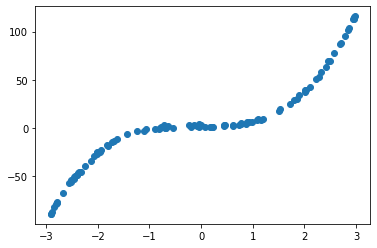

In [118]:
plt.scatter(X,y)

In [119]:
line.shape

(100, 1)

In [120]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X,y)
pred = lr.predict(line)

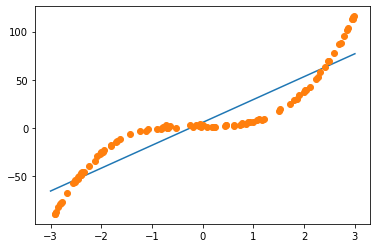

In [121]:
plt.plot(line, pred)
plt.plot(X,y,"o")

In [122]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 3, include_bias= False)
X_poly = poly.fit_transform(X)
line_poly = poly.fit_transform(line)

In [123]:
line_poly = poly.transform(line)

In [124]:
lr = LinearRegression()
lr.fit(X_poly, y)

LinearRegression()

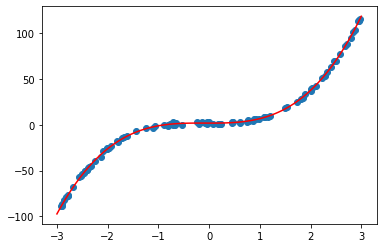

In [125]:
plt.plot(line, lr.predict(line_poly), c = "r")
plt.scatter(X,y)

In [126]:
lr.coef_

array([[-0.09515235,  0.97387191,  4.009841  ]])

### ANOVA 분석

생존과 요금, 나이에 대해 이원분산 분석을 수행하라

In [127]:
df = pd.read_csv(r"C:\Users\gg787\ADP_데싸라면\adp_데이터모음\data\avocado.csv")
df.drop("Unnamed: 0", axis = 1, inplace = True)

In [128]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [129]:
avocado = df[["type","region","AveragePrice"]]

In [130]:
avocado = avocado[(avocado["region"] == "Albany")|(avocado["region"] == "Sacramento")|(avocado["region"] == "Northeast")]

In [131]:
avocado

,type,region,AveragePrice
0,conventional,Albany,1.33
1,conventional,Albany,1.35
2,conventional,Albany,0.93
3,conventional,Albany,1.08
4,conventional,Albany,1.28
...,...,...,...
18088,organic,Sacramento,1.50
18089,organic,Sacramento,1.99
18090,organic,Sacramento,1.62
18091,organic,Sacramento,1.60


In [132]:
avocado["region"].value_counts()

Albany        338
Northeast     338
Sacramento    338
Name: region, dtype: int64

In [133]:
avocado["type"].value_counts()

conventional    507
organic         507
Name: type, dtype: int64

In [134]:
# 추후 interaction graph 를 그리기 위해 시리즈별로 추출

average_price = avocado["AveragePrice"]
type_series = avocado["type"]
region = avocado["region"]

In [135]:
# 분산분석 수행
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [136]:
formula = "AveragePrice~C(type)*C(region)"
model = ols(formula, avocado).fit()
aov_table = anova_lm(model,typ = 2)

In [137]:
aov_table

,sum_sq,df,F,PR(>F)
C(type),75.271314,1.0,1512.893993,7.435108e-203
C(region),0.644668,2.0,6.478661,1.600603e-03
C(type):C(region),3.208518,2.0,32.244343,2.667950e-14
Residual,50.151224,1008.0,NaN,NaN


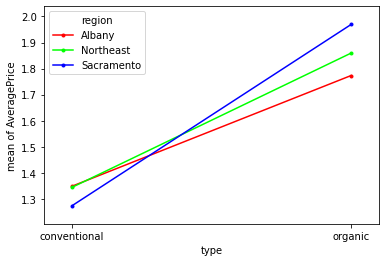

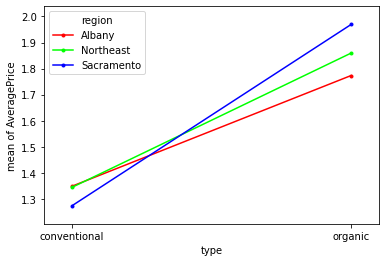

In [138]:
from statsmodels.graphics.factorplots import interaction_plot

interaction_plot(type_series,region,average_price)